## Lab 2 Queries to Structured Data 

## Acknowledgement: This lab has been adopted from a lab previously developed at UC Berkeley (for the data 8 course).


### Like Lab 1, the first thing we need to do is to install the datascience module, which was also developed at UC Berkeley for the data 8 course.

A module is a collection of Python code that, together, forms a code library that can be directly used by Python developer. Azure Jupyter Notebook already has several modules installed.  For example, we will later use sklearn module to create decision tree models from a set of labelled data. Because the datascience module is not pre-installed in Azure Jupyter Notebook,  we need to use the following command to install it in the beginning of every Azure notebook that needs to use it.
### Complete "!pip install datascience" in the line below.  Then click the "Run" button (under the "Cell" menu item on the top row of this web page) 

In [1]:
!pip install datascience

     |████████████████████████████████| 51kB 1.5MB/s eta 0:00:01
     |████████████████████████████████| 92kB 2.6MB/s eta 0:00:011
     |████████████████████████████████| 13.0MB 10kB/s  eta 0:00:01    | 675kB 1.0MB/s eta 0:00:13     |███                             | 1.2MB 1.0MB/s eta 0:00:12     |█████                           | 2.1MB 1.0MB/s eta 0:00:11     |█████▍                          | 2.2MB 1.0MB/s eta 0:00:11     |███████████████▏                | 6.2MB 7.3MB/s eta 0:00:01
     |████████████████████████████████| 215kB 5.9MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/1d/e7/fd8b501e7a6dfe492a433deb7b9d833d39ca74916fa8bc63dd1a4947a671/Jinja2-2.10.1-py2.py3-none-any.whl
     |████████████████████████████████| 92kB 1.1MB/s eta 0:00:01
  Created wheel for datascience: filename=datascience-0.15.0-cp35-none-any.whl size=43984 sha256=9852ded0f80a46bff3c252d0679ea0c70df5dd37e7199872071ad959645baeef
  Stored in directory: /home/nbuser/.cache/pip/wheels/05/85/8

    Uninstalling Jinja2-2.8:
      Successfully uninstalled Jinja2-2.8
  Found existing installation: matplotlib 2.1.1
    Uninstalling matplotlib-2.1.1:
      Successfully uninstalled matplotlib-2.1.1
You should consider upgrading via the 'pip install --upgrade pip' command.


## Like Lab 1, we need to import datascience module before we can use functions/methods (codes) defined in the module later in the lab.

### For Example, one of the feature of datascience module is to enable us to easily post a query to a tabular data, and visualize data in the table in multiple ways (e.g., bar chart, scatter plot, etc).

In [2]:
from datascience import *

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:232: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


### Milestone 1: Congratulations!  You have reached your first milestone for Lab 2.  Click "A" on iClicker to indicate you have completed this milestone for Lab 2.


## Like Lab 1, we will use a the Table class of datascience module to read a CSV file that contains salary data of employees of San Francisco City.
## Source of The Data: Kaggle https://www.kaggle.com/kaggle/sf-salaries

A table can be used to store structured data, where each row contains one "entity" (e.g., one transaction,
one employee, one patient, etc) to be stored.  The columns of the Table represents an attribute of the "entity"
(e.g., the amount of a transaction, the vendor of the transaction, etc). 

### Note: In relational database management systems (RDMS), a "relation" corresponds to the "table" here, even though Table in Datascience module is not a RDMS.  RDMS and associated queries are topics covered in DS 220.

Like Lab 1, we use Table.read_table to read a CSV file called "SFSalaries2011_2014.csv".
#### Note 1: We use a pair of double quotes "....." to indicate a string in Python.  Otherwise, Python may interpret it as a variable name (like salaries).
#### Note 2: Table.read_table is like a function.  It takes a file name as input, and returns a Table object as its output.
#### Note 3: We can use assignment (=) in Python to assign the output of the function Table.read_table to a variable (like salaries)
#### Note 4: Running a line that contains only a variable results in displaying the content of the variable.

In [5]:
# read a CSV file of salaries from SF City into a table
salaries = Table.read_table("SFSalaries2011_2014.csv")    
salaries.show(5)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,nan,567595,567595,2011,nan,San Francisco,nan
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,nan,538909,538909,2011,nan,San Francisco,nan
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,nan,335280,335280,2011,nan,San Francisco,nan
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,nan,332344,332344,2011,nan,San Francisco,nan
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,nan,326373,326373,2011,nan,San Francisco,nan


## Selection Query
### Table.where( "?column name", are.above(x)) selects all rows whose specified column is greater than the threshold provided (i.e., &gt; x).

For example, if we want select all employees whose salaries are greater than 100000, we can do this as follows:

In [6]:
high_salaries = salaries.where("TotalPay", are.above(100000))    
high_salaries.show(5)

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,nan,567595,567595,2011,nan,San Francisco,nan
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,nan,538909,538909,2011,nan,San Francisco,nan
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,nan,335280,335280,2011,nan,San Francisco,nan
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,nan,332344,332344,2011,nan,San Francisco,nan
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,nan,326373,326373,2011,nan,San Francisco,nan


## Exercise 1 Selection Query

Find all of employee entries with TotalPay is higher than a threshold you select.

In [7]:
selected_salaries= salaries.where('TotalPay', are.above(50000))
selected_salaries.show(5)

Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,nan,567595,567595,2011,nan,San Francisco,nan
2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,nan,538909,538909,2011,nan,San Francisco,nan
3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,nan,335280,335280,2011,nan,San Francisco,nan
4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,nan,332344,332344,2011,nan,San Francisco,nan
5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,nan,326373,326373,2011,nan,San Francisco,nan


## Projection Query

### Table.select("column name 1", "column name 2", ...) returns a new table that contain ONLY those columns specified.

Example: Projection on Job Title and Total Pay for the SF salary data:

### Summary of Data Types

For your later reference, here are the principal types of data we'll work with in this course.

|English name|Python name|Example|Example Python expressions|
|-|-|-|-|
|Number|`float` (numbers with decimals) or `int` (integers)|The number of words in a book|`2`, `.25`, `2+2`|
|Text|`string`|A word, chapter, or whole text of a book|`"I &lt;3 Data Science"`|
|A collection of multiple kinds of data|`table`|The letter grades and all the project, midterm, and final exam scores in a class|`Table.read_table("data/imdb_ratings.csv")`|


In [8]:
Title_TotalPay = salaries.select("JobTitle","TotalPay")
Title_TotalPay.show(5)

JobTitle,TotalPay
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595
CAPTAIN III (POLICE DEPARTMENT),538909
CAPTAIN III (POLICE DEPARTMENT),335280
WIRE ROPE CABLE MAINTENANCE MECHANIC,332344
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373


## Exercise 2 Combine Selection and Projection Query

First, select all those employees whose salaries are above 50000.
Then, creates a table that contains only three columns: JobTitle, TotalPay, and Year

In [9]:
selected_salaries = salaries.where('TotalPay', are.above(50000))
projected_salaries = selected_salaries.select( 'JobTitle', 'TotalPay', 'Year')
projected_salaries.show(5)

JobTitle,TotalPay,Year
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595,2011
CAPTAIN III (POLICE DEPARTMENT),538909,2011
CAPTAIN III (POLICE DEPARTMENT),335280,2011
WIRE ROPE CABLE MAINTENANCE MECHANIC,332344,2011
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373,2011


## Grouping Query

### Table.group("column name") returns a new table that contains a counter (i.e., the total number of rows) for each value of the column.

Example: Group the SF salaries by JobTitle to find out the total number of entries associated with each JobTitle.

In [10]:
Title_counter = salaries.group("JobTitle")
Title_counter.show(5)

JobTitle,count
ACCOUNT CLERK,83
ACCOUNTANT,5
ACCOUNTANT INTERN,48
"ACPO,JuvP, Juv Prob (SFERS)",1
ACUPUNCTURIST,1


# <a></a> Visualizations

Using tables, we can easily create different types of visualizations. This section will go over how to create bar charts. Bar charts allow us to visualize **categorical distribtions**. Before we get started, please run the cell below to import the necessary modules.

In [11]:
# Run this cell, but please don't change it.

# These lines import the NumPy, datascience, and math modules.
import numpy as np
import math
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Visualize Query Results: It is often useful to be able to visualize the results of the query.

#### Bar Chart: Table.barh("Column 1", "Column 2")
- Column 1: Different categories
- Column 2: Values associated with each category.

#### Visualization Problem: Visualize the number of entries with different job title
First, we need to see how many JobTitles are there so that we can trim down to visualize
only those that have significant number of entries. 
The easiest way to do this is
1. Sort the table by count.
2. Select the top k to visualize.

Below is an example to visualize the counter of Job Titles that have at least 1000 entries.

In [12]:
Sorted_Title_counter= Title_counter.sort("count", descending=True)
Sorted_Title_counter.show(5)

JobTitle,count
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


In [13]:
Filtered_Title_counter = Sorted_Title_counter.where("count", are.above(1000))
Filtered_Title_counter.show(5)

JobTitle,count
Transit Operator,7036
Special Nurse,4389
Registered Nurse,3736
Public Svc Aide-Public Works,2518
Police Officer 3,2421


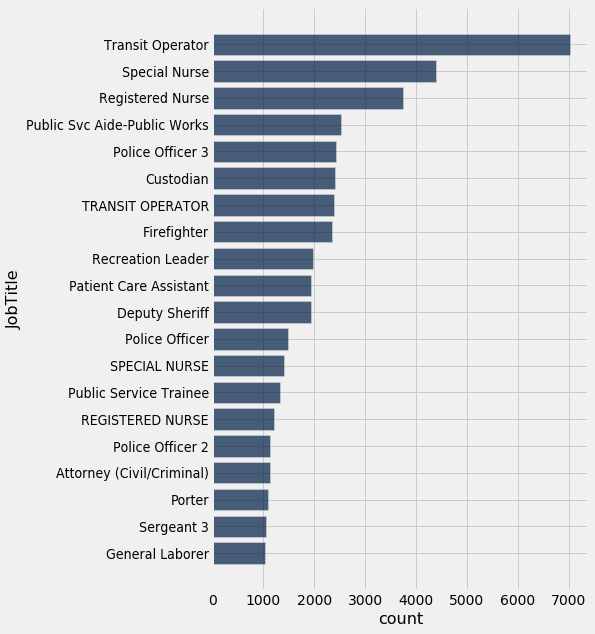

In [14]:
Filtered_Title_counter.barh("JobTitle","count")

## Exercise 3

Visualize the number of employees for different Job Titles that have at least 500 entries in the table.

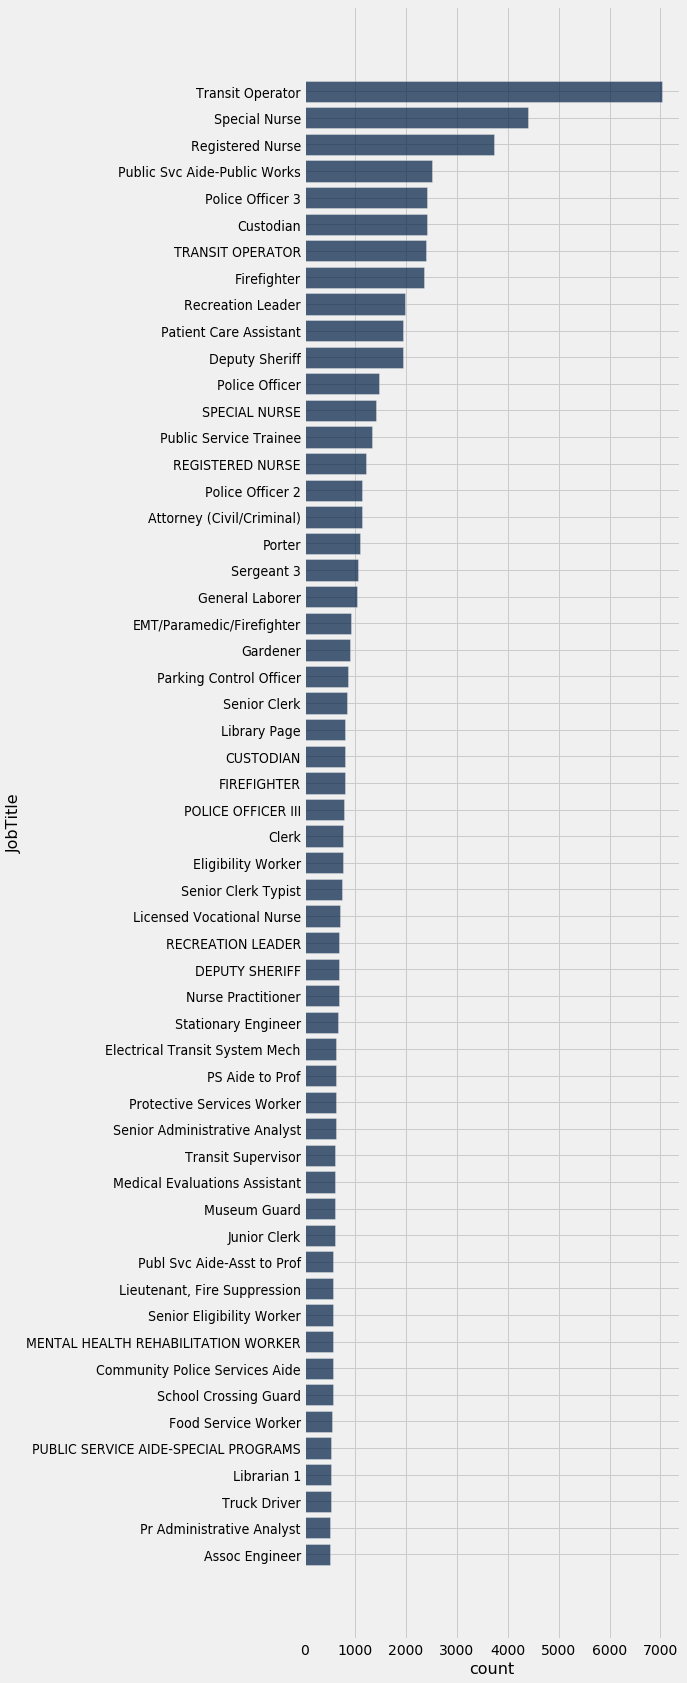

In [15]:
Filtered_Title_counter = Sorted_Title_counter.where("count", are.above(500))
Filtered_Title_counter.barh("JobTitle","count")

## Join Queries 
Suppose we want to compare average salaries of different job titles of SF city employees between 2011 and 2014, one way to do this is the following:
1. Calculate the sum of TotalPay for all entries in each group having the same Job Title.
2. Join the table that counts Sum of TotalPay with the table that contains the counter for each Job Title
3. Calculate the Average TotalPay for each Job Title
4. Add the Average TotalPay to the Joined Table
5. Visualize Average TotalPay for Job Title that has at least n entries.

In [16]:
# Extract just the "JobTitles" and "TotalPay" columns
salaries_titles = salaries.select('JobTitle', 'TotalPay')
salaries_titles.show(5)

JobTitle,TotalPay
GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,567595
CAPTAIN III (POLICE DEPARTMENT),538909
CAPTAIN III (POLICE DEPARTMENT),335280
WIRE ROPE CABLE MAINTENANCE MECHANIC,332344
"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",326373


In [17]:
TotalSalaries_titles = salaries_titles.group('JobTitle', collect=sum)
TotalSalaries_titles.show(5)

JobTitle,TotalPay sum
ACCOUNT CLERK,3.65496e+06
ACCOUNTANT,237146
ACCOUNTANT INTERN,1.39352e+06
"ACPO,JuvP, Juv Prob (SFERS)",62290.8
ACUPUNCTURIST,67594.4


### Noticice: The code above creates a new column called "TotalPay sum".
This is because the salaries_titles.group method can take a second parameter "collect=", which
specifies the way TotalPay in each Job Title is aggregated.  In our case, we want to add all
of the TotalPay for each Job Title, this is what "collect=sum" does.  The resulted sum for
each Job Title is a new column (named "TotalPay sum") in the new Table generated.

### Count Number of Employees in Each Job Title
Like in Exercise 3, we count the total number of employees in each job title using `group` method with the default value for`collect` (which is to count the number of rows in each job title).

In [18]:
TotalCount_titles = salaries_titles.group('JobTitle')
TotalCount_titles.show(5)

JobTitle,count
ACCOUNT CLERK,83
ACCOUNTANT,5
ACCOUNTANT INTERN,48
"ACPO,JuvP, Juv Prob (SFERS)",1
ACUPUNCTURIST,1


### Join Queries
The two tables above (TotalSalaries_titles and TotalCount_titles) have the same JobTitle column.  Therefore, we can join these two talbes into one table using the "join" operation.

#### Note: The size of the generated table is the same as the size of the two input tables in this case.  In general, however, this may not be the case.  For example, a table of credit card fraud (that contains websites for online credit card transactions) can be joined with a table of known compromised websites.

In [19]:
TotalSalaries_Count_Titles= TotalSalaries_titles.join('JobTitle', TotalCount_titles)
TotalSalaries_Count_Titles.show(5)

JobTitle,TotalPay sum,count
ACCOUNT CLERK,3.65496e+06,83
ACCOUNTANT,237146,5
ACCOUNTANT INTERN,1.39352e+06,48
"ACPO,JuvP, Juv Prob (SFERS)",62290.8,1
ACUPUNCTURIST,67594.4,1


In [20]:
AvgSalaries_Titles= TotalSalaries_Count_Titles.apply(lambda x, y: x/y, "TotalPay sum", "count")
AvgSalaries_Titles

array([44035.66433735, 47429.268     , 29031.74291667, ...,
       53632.87      , 41414.3075    , 66686.56      ])

In [21]:
AvgSalaries_and_Titles= TotalSalaries_Count_Titles.with_column('Avg TotalPay', AvgSalaries_Titles)
AvgSalaries_and_Titles.show(5)

JobTitle,TotalPay sum,count,Avg TotalPay
ACCOUNT CLERK,3.65496e+06,83,44035.7
ACCOUNTANT,237146,5,47429.3
ACCOUNTANT INTERN,1.39352e+06,48,29031.7
"ACPO,JuvP, Juv Prob (SFERS)",62290.8,1,62290.8
ACUPUNCTURIST,67594.4,1,67594.4


### How do we visualize average total pay by job title, since there are more than 2000 titles?
We are most interested in average total pay with significant number of employers. 


In [22]:
AvgSalaries_and_Titles2= AvgSalaries_and_Titles.sort('count', descending=True)
AvgSalaries_and_Titles2.show(5)

JobTitle,TotalPay sum,count,Avg TotalPay
Transit Operator,4.55308e+08,7036,64711.1
Special Nurse,1.45548e+08,4389,33161.9
Registered Nurse,4.32257e+08,3736,115701
Public Svc Aide-Public Works,2.07541e+07,2518,8242.31
Police Officer 3,3.2661e+08,2421,134907


### How to select the job titles to visualize their salaries? 
Should we use a threshold of count (say 1000) so that we focus on those job titles that have at least 1000 rows (i.e., at least 1000 entries with the job title)?  If so, what threshold should we use? 

To help us to make a decision, it may be useful to get some simple statistics (minimum value, maximum value, median value) for each column.

In [23]:
AvgSalaries_and_Titles2.stats()

statistic,JobTitle,TotalPay sum,count,Avg TotalPay
min,ACCOUNT CLERK,0,1,0
max,ZOO CURATOR,4.55308e+08,7036,399211
median,,924342,13,78914.4
sum,,1.11146e+10,148654,1.85738e+08


### Surprise about the midian of count so low (13), while the maximum is so high (7036)?  What does this mean?

As a first trial, we can use the same threshold (count &gt; 1000) in Exercise 4.

In [24]:
SelectedTable= AvgSalaries_and_Titles2.where('count', are.above(1000))
SelectedTable.show(5)

JobTitle,TotalPay sum,count,Avg TotalPay
Transit Operator,4.55308e+08,7036,64711.1
Special Nurse,1.45548e+08,4389,33161.9
Registered Nurse,4.32257e+08,3736,115701
Public Svc Aide-Public Works,2.07541e+07,2518,8242.31
Police Officer 3,3.2661e+08,2421,134907


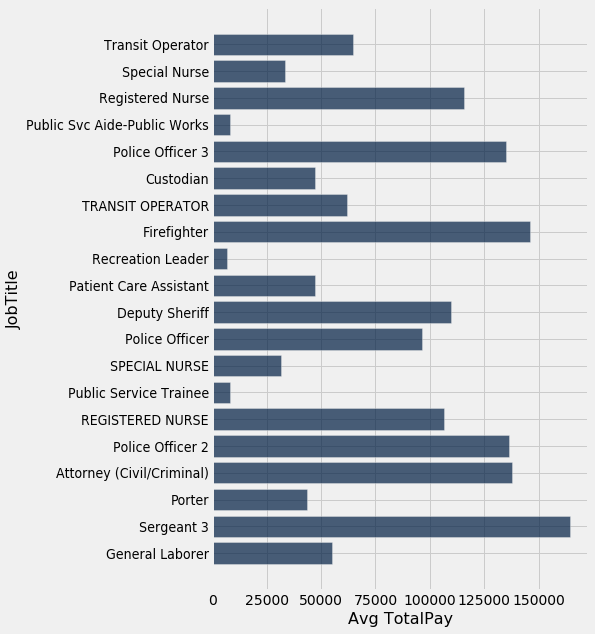

In [25]:
SelectedTable.barh("JobTitle", "Avg TotalPay")

## Exercise 4
- Select a different threshold for the minimum number of employees you want to include in comparing average salaries of different job titles.  
- Sort the table by "Avg TotalSalary".
- Display the bar chart of Average Total Pay for all the Job Categories that satisfied the selection criteria.

In [27]:
SelectedTable2= AvgSalaries_and_Titles2.where('count', are.above(500))
SelectedTable2.show(5)

JobTitle,TotalPay sum,count,Avg TotalPay
Transit Operator,4.55308e+08,7036,64711.1
Special Nurse,1.45548e+08,4389,33161.9
Registered Nurse,4.32257e+08,3736,115701
Public Svc Aide-Public Works,2.07541e+07,2518,8242.31
Police Officer 3,3.2661e+08,2421,134907


In [28]:
SelectedTable3 = SelectedTable2.sort('Avg TotalPay', descending=True)
SelectedTable3.show(5)

JobTitle,TotalPay sum,count,Avg TotalPay
"Lieutenant, Fire Suppression",1.03754e+08,572,181387
Sergeant 3,1.7239e+08,1047,164652
Firefighter,3.44135e+08,2359,145882
FIREFIGHTER,1.10598e+08,794,139292
Attorney (Civil/Criminal),1.55345e+08,1126,137961


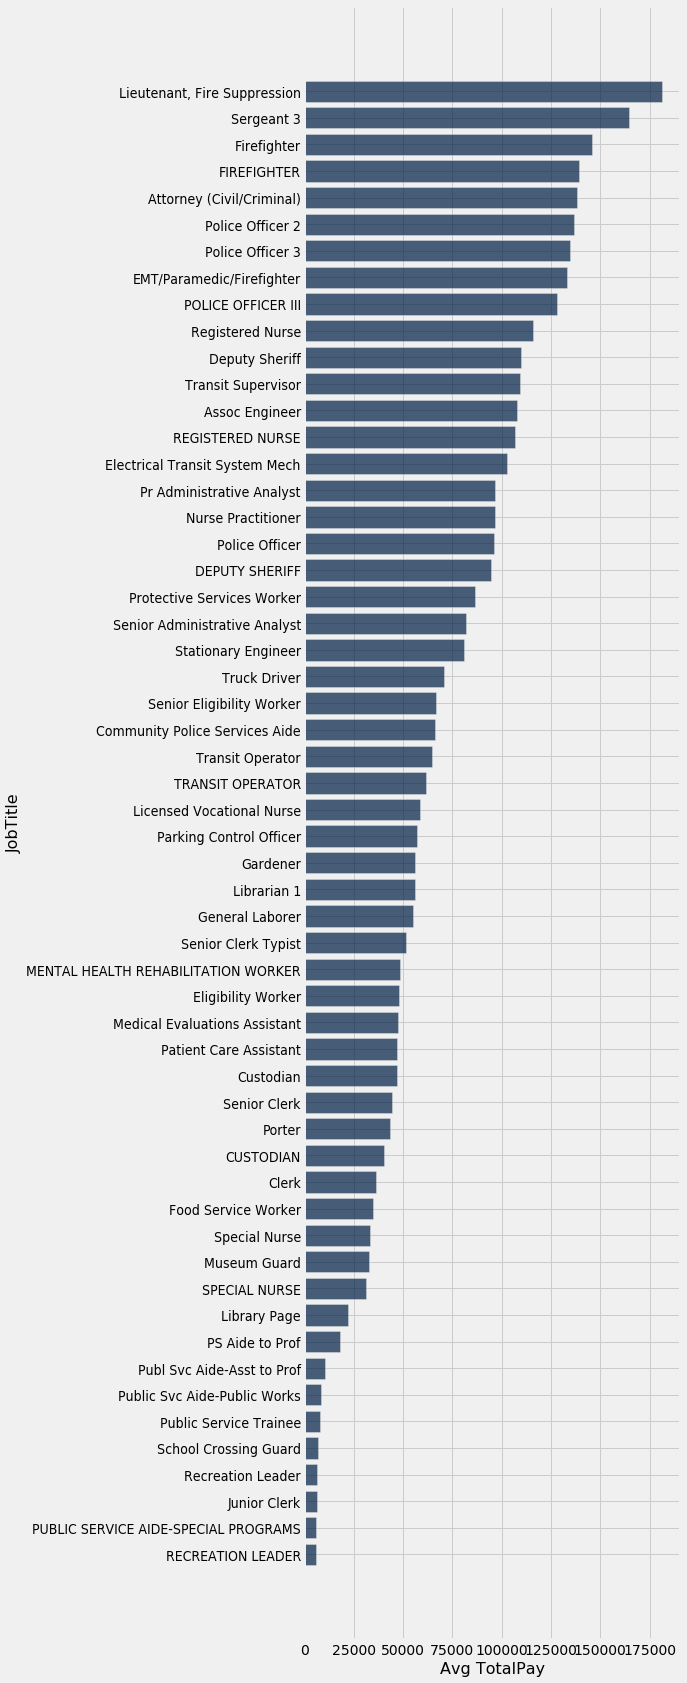

In [29]:
# Draw the bar chart for Exercise 5
SelectedTable3.barh('JobTitle', 'Avg TotalPay')